RobomimicDataset (
	path=../../datasets/test/square_ph.hdf5
	obs_group_to_keys={'obs': ['robot0_eef_pos', 'robot0_eef_quat', 'agentview_image'], 'goal': ['agentview_image']}
	obs_keys=('agentview_image', 'robot0_eef_pos', 'robot0_eef_quat')
	filter_key=none
	cache_mode=none
	frame_stack=0
	seq_length=1
	pad_seq_length=True
	pad_frame_stack=True
	goal_mode=last
	num_subgoal=none
	num_demos=200
	num_sequences=30154
)
gc on last frame only


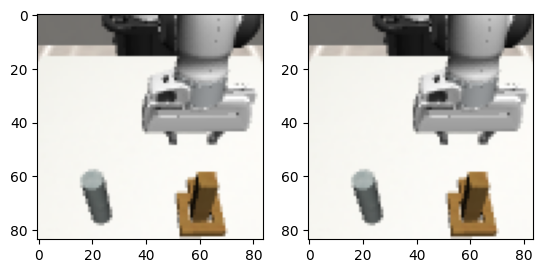

dense subgoals


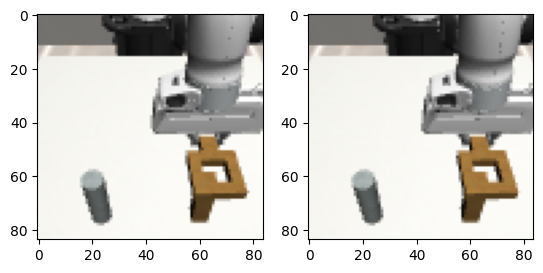

sparse subgoals


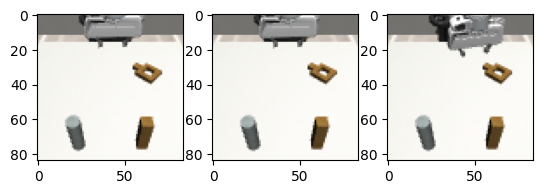

In [3]:
from mental_models.dataset.dataset import RobomimicDataset
import robomimic.utils.obs_utils as ObsUtils
import matplotlib.pyplot as plt
import torch 
from torch.utils.data import DataLoader
import h5py
import numpy as np

modality_to_obs_keys = {"low_dim": ["robot0_eef_pos", "robot0_eef_quat", "actions"],
                        "rgb": ["agentview_image"]}
obs_group_to_keys = {"obs": ["robot0_eef_pos", "robot0_eef_quat", "agentview_image"], 
                     "goal": ["agentview_image"]}
dataset_keys = ["actions"]

ObsUtils.initialize_obs_modality_mapping_from_dict(modality_mapping=modality_to_obs_keys)

dataset_path = "../../datasets/test/square_ph.hdf5"
dataset = RobomimicDataset(
    hdf5_path=dataset_path,
    obs_group_to_keys=obs_group_to_keys, 
    dataset_keys=dataset_keys, 
    goal_mode="last"
    )

# verify basic properties
print(dataset)

# verify gc on last frame only
print("gc on last frame only")
fig, axs = plt.subplots(1, 2)
goal0 = dataset.get_item(0)["goal"]["agentview_image"][0]
axs[0].imshow(np.transpose(goal0, (1, 2, 0)))
goal99 = dataset.get_item(99)["goal"]["agentview_image"][0]
axs[1].imshow(np.transpose(goal99, (1, 2, 0)))
plt.show()

# verify dense subgoal
print("dense subgoals")
dataset.goal_mode = "subgoal"
fig, axs = plt.subplots(1, 2)
goal98 = dataset.get_item(98)["goal"]["agentview_image"][0]
axs[0].imshow(np.transpose(goal98, (1, 2, 0)))
goal99 = dataset.get_item(99)["goal"]["agentview_image"][0]
axs[1].imshow(np.transpose(goal99, (1, 2, 0)))
plt.show()

# verify sparse subgoal
print("sparse subgoals")
dataset.goal_mode = "subgoal"
dataset.num_subgoal = 15 # ~ every 10 frames
fig, axs = plt.subplots(1, 3)
goal0 = dataset.get_item(0)["goal"]["agentview_image"][0]
axs[0].imshow(np.transpose(goal0, (1, 2, 0)))
goal1 = dataset.get_item(1)["goal"]["agentview_image"][0]
axs[1].imshow(np.transpose(goal1, (1, 2, 0)))
goal14 = dataset.get_item(14)["goal"]["agentview_image"][0]
axs[2].imshow(np.transpose(goal14, (1, 2, 0)))
plt.show()

